In [1]:
from transformers import pipeline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from sklearn.decomposition import NMF
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from sklearn.cluster import OPTICS, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import f_oneway
from sentence_transformers import SentenceTransformer
from scipy import stats
import statsmodels.api as sm
from sklearn.metrics import f1_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier


/Users/alexanders/ml-project-2-peaceduke-1/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
s1_exp1_impressions_df = pd.read_csv("1stSession_EXP1 Impressions.csv")
s1_exp2_impressions_df = pd.read_csv("1stSession_EXP2 Impressions.csv")
s1_exp1_background_df = pd.read_csv("1stSession_EXP1 BackgroundEnvironment.csv")
s1_exp2_background_df = pd.read_csv("1stSession_EXP2 BackgroundEnvironment.csv")


s2_exp1_impressions_df = pd.read_csv("2ndSession_EXP1 Impressions.csv")
s2_exp2_impressions_df = pd.read_csv("2ndSession_EXP2 Impressions.csv")
s2_exp1_background_df = pd.read_csv("2ndSession_EXP1 BackgroundEnvironment.csv")
s2_exp2_background_df = pd.read_csv("2stSession_EXP2 BackgroundEnvironment.csv")

In [3]:
combined_e1 = pd.concat(
    [s1_exp1_impressions_df, s2_exp1_impressions_df], ignore_index=True
)
combined_e2 = pd.concat(
    [s1_exp2_impressions_df, s2_exp2_impressions_df], ignore_index=True
)

In [4]:
sentiment_analysis = pipeline(
    "sentiment-analysis", model="siebert/sentiment-roberta-large-english"
)


def calculate_roberta_sentiment(text):
    """
    Given an arbitrary text, return its sentiment (either +1 or -1)
    """
    results = sentiment_analysis(text)
    text_class = 0
    for result in results:
        if result["label"] == "NEGATIVE":
            text_class -= 1
        if result["label"] == "POSITIVE":
            text_class += 1
    return text_class


combined_e1["Sentiment"] = combined_e1["Sentences Overall"].apply(
    calculate_roberta_sentiment
)
combined_e2["Sentiment"] = combined_e2["Sentences Overall"].apply(
    calculate_roberta_sentiment
)

In [5]:
combined_e1.to_csv('combined_e1.csv')
combined_e2.to_csv('combined_e2.csv')

In [6]:
# combined_e1=pd.read_csv('combined_e1.csv')
# combined_e2=pd.read_csv('combined_e2.csv')

In [7]:
def elbow(features_for_clustering, label):
    """
    Identifies the optimal value of K for K means
    """
    # Elbow method
    sse = []
    for k in range(1, 11):  # Test k from 1 to 10 (or any reasonable upper limit)
        kmeans = KMeans(n_clusters=k, random_state=0).fit(features_for_clustering)
        sse.append(kmeans.inertia_)  # Inertia: Sum of distances of samples to their closest cluster center

    # Plotting the Elbow Method graph
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, 11), sse, marker='o')
    plt.title(label)
    plt.xlabel('Number of clusters')
    plt.ylabel('SSE')
    plt.show()

/Users/alexanders/ml-project-2-peaceduke-1/.venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/Users/alexanders/ml-project-2-peaceduke-1/.venv/lib/python3.9/site-packages/threadpoolctl.py:1010: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cau

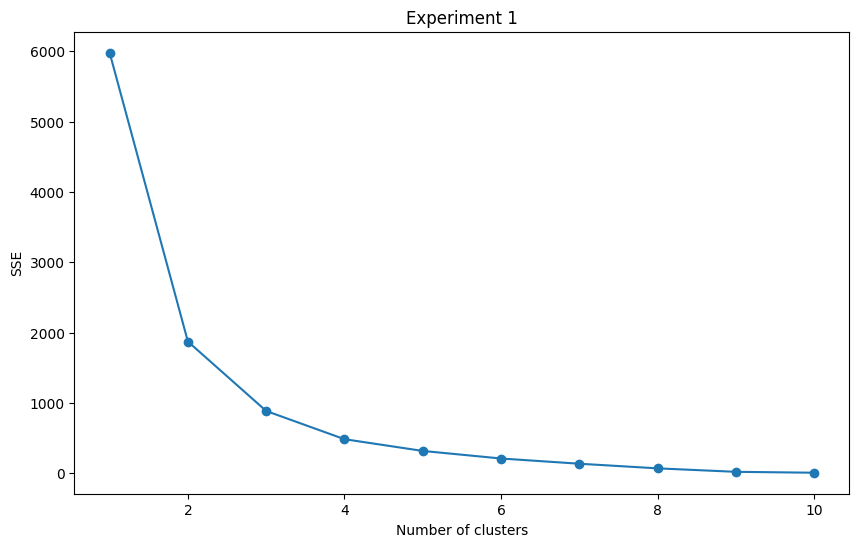

/Users/alexanders/ml-project-2-peaceduke-1/.venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/alexanders/ml-project-2-peaceduke-1/.venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/alexanders/ml-project-2-peaceduke-1/.venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/alexanders/ml-project-2-peaceduke-1/.venv/lib/python3.9/site-packa

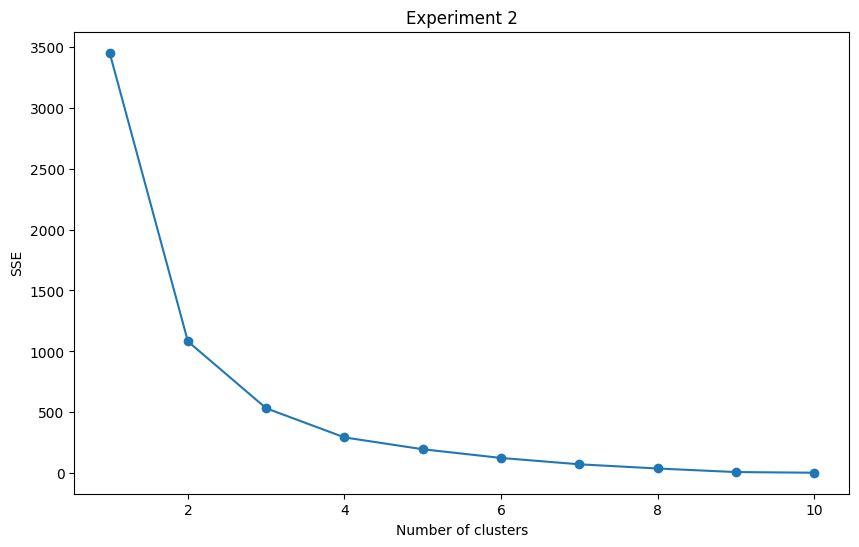

In [8]:
features_for_clustering_e1 = combined_e1[
    ["Interesting"]
].dropna()

features_for_clustering_e2 = combined_e2[
    ["Interesting"]
].dropna()

elbow(features_for_clustering_e1, "Experiment 1")
elbow(features_for_clustering_e2, "Experiment 2")


In [9]:
def cluster_features(features, df):
    """
    Applies K means clustering with K=3 to the group datapoints by a given feature
    """
    new_df = df.copy()
    for feature in features:
        features_for_clustering = new_df[[feature]]
        kmeans = KMeans(n_clusters=3, random_state=0).fit(features_for_clustering)
        new_df["Cluster_" + feature] = kmeans.labels_
    return new_df


new_df_1 = cluster_features(
    ["Interesting", "Pleasant", "Engaging", "Enjoy Working"], combined_e1
)
new_df_2 = cluster_features(
    ["Interesting", "Pleasant", "Engaging", "Enjoy Working"], combined_e2
)

/Users/alexanders/ml-project-2-peaceduke-1/.venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/alexanders/ml-project-2-peaceduke-1/.venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/alexanders/ml-project-2-peaceduke-1/.venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/alexanders/ml-project-2-peaceduke-1/.venv/lib/python3.9/site-packa

In [10]:
def test_scene_type_differences(new_df, features, dependents):
    """
    Performs Chi-Square test to see if the clusters have a significantly different distribution of scene number and scene type
    """
    d = {}
    for feature in features:
        for dep in dependents:
            # Create a contingency table
            contingency_table = pd.crosstab(new_df[f"Cluster_{feature}"], new_df[dep])

            # Perform the chi-square test
            chi2, p, _, _ = chi2_contingency(contingency_table)
            num_comparisons = len(pd.unique(new_df[dep]))

            # Check for significance
            alpha = 0.05
            # Apply bonferroni correction
            bonferroni_alpha = alpha / num_comparisons
            if p < bonferroni_alpha:
                print(
                    f"There are significant differences in {dep} within the clusters based on {feature}"
                )
                print("\n")
                if not feature in d:
                    d[feature] = [dep]
                else:
                    d[feature].append(dep)
        return d


differences_1 = test_scene_type_differences(
    new_df_1,
    ["Interesting", "Pleasant", "Engaging", "Enjoy Working"],
    ["Scene Type", "Scene Number"],
)

There are significant differences in Scene Number within the clusters based on Interesting




In [11]:
differences_2 = test_scene_type_differences(
    new_df_2,
    ["Interesting", "Pleasant", "Engaging", "Enjoy Working"],
    ["Scene Type", "Scene Number"],)

There are significant differences in Scene Type within the clusters based on Interesting


There are significant differences in Scene Number within the clusters based on Interesting




In [12]:
differences_2

{'Interesting': ['Scene Type', 'Scene Number']}

In [13]:
def anova_for_groups(new_df_2, label):
    """ 
    Applies one-way ANOVA test to check if the clusters have significant differences in their average values 
    """
    print(label)
    # Group the data by cluster labels
    groups = [new_df_2['Interesting'][new_df_2['Cluster_Interesting'] == label] for label in new_df_2['Cluster_Interesting'].unique()]

    # Perform ANOVA test
    f_statistic, p_value = stats.f_oneway(*groups)

    # Print the results
    print("F-statistic:", f_statistic)
    print("P-value:", p_value)

    # Determine significance based on the p-value
    alpha = 0.05  # Set your desired significance level (e.g., 0.05)
    if p_value < alpha:
        print("The means within clusters are significantly different.")
    else:
        print("There is no significant difference in means within clusters.")


In [14]:
anova_for_groups(new_df_1, "Experiment 1")
anova_for_groups(new_df_2, "Experiment 2")

Experiment 1
F-statistic: 3738.1883800319406
P-value: 0.0
The means within clusters are significantly different.
Experiment 2
F-statistic: 2287.3845917116946
P-value: 0.0
The means within clusters are significantly different.


In [15]:
def bar_plot_clusters(new_df_2, feature, label):
    """ 
    Creates bar plots for clusters based on the provided feature
    """
    # Assuming "df" is your DataFrame
    plt.figure(figsize=(5, 5))  # Set the figure size as needed

    # Create the boxplot based on "labels" and "interesting" feature
    sns.boxplot(data=new_df_2, x=f'Cluster_{feature}', y='Interesting')

    # Set labels for the plot
    plt.xlabel('Cluster Labels')
    plt.ylabel(f'{feature} Feature')

    # Set a title for the plot
    plt.title(label)

    # Show the plot
    plt.savefig(f'{label}_{feature}.png')
    plt.show()

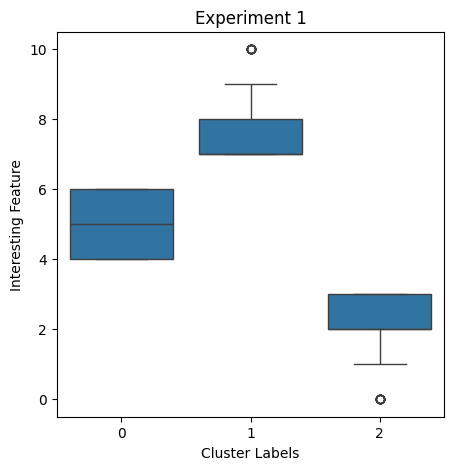

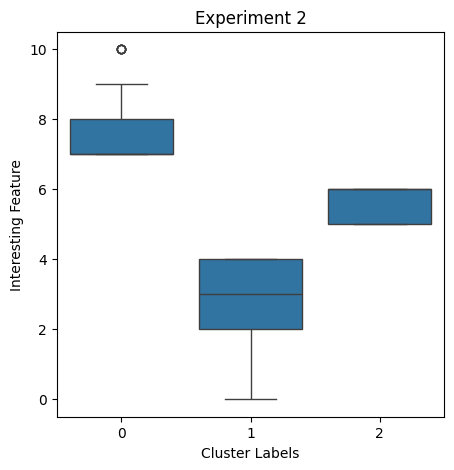

In [16]:
bar_plot_clusters(new_df_1, 'Interesting', 'Experiment 1')
bar_plot_clusters(new_df_2, 'Interesting', 'Experiment 2')

In [17]:
tfidf_vectorizer = TfidfVectorizer(
    max_df=0.95, min_df=2, stop_words="english", ngram_range=(1, 1)
)


def print_common_words(text):
    """ 
    Given an arbitrary text, prints the top 10 most frequent meaningful words
    """
    tfidf_cluster = tfidf_vectorizer.transform(text)
    sorted_words = np.argsort(tfidf_cluster.toarray()).flatten()[::-1]
    top_words = [tfidf_vectorizer.get_feature_names_out()[i] for i in sorted_words[:10]]
    print(top_words)

In [18]:
def preprocess(grouped_dataframe, tfidf_vectorizer, name, feature):
    """ 
    Stores the 10 most frequent words within each cluster in the dataframe in a csv file
    """
    with open(name, "w") as file:
        file.write(f"Score_{feature}, Top words\n")
        for index, row in grouped_dataframe.iterrows():
            tfidf_result = tfidf_vectorizer.fit_transform(
                row["Sentences Overall"].split(";;;\n")
            )
            nmf_result = NMF(n_components=1, random_state=1).fit(tfidf_result)
            feature_names = tfidf_vectorizer.get_feature_names_out()
            for index, topic in enumerate(nmf_result.components_):
                top_words = " ".join(
                    [feature_names[i] for i in topic.argsort()[:-11:-1]]
                )
                file.write(f"{row[feature]}, {top_words}\n")

In [19]:
def preprocess_groups(
    grouped_dataframe, tfidf_vectorizer, name, dependents, value_counts
):
    """ 
    Stores the 10 most frequent words within each group from a given cluster in the dataframe in a csv file
    """
    with open(name, "w") as file:
        head = ", ".join([d for d in dependents]) + ", Top words\n"
        file.write(head)
        for index, row in grouped_dataframe.iterrows():
            if len(row["Sentences Overall"].split(";;;\n")) > 1:
                tfidf_result = tfidf_vectorizer.fit_transform(
                    row["Sentences Overall"].split(";;;\n")
                )
                nmf_result = NMF(n_components=1, random_state=1).fit(tfidf_result)
                feature_names = tfidf_vectorizer.get_feature_names_out()
                for index, topic in enumerate(nmf_result.components_):
                    top_words = " ".join(
                        [feature_names[i] for i in topic.argsort()[:-11:-1]]
                    )
                    file.write(
                        f"{', '.join([f'{d}:{row[d]}' for d in dependents])}, {top_words}\n"
                    )

In [20]:
tfidf_vectorizer = TfidfVectorizer(
    max_df=0.95, min_df=1, stop_words="english", ngram_range=(1, 1)
)


def analyze_dependencies(new_df, differences, exp):
    """ 
    Given the dataframe, and the significant differences, stores the top 10 words of each cluster, and the top 10 words of relevant groups within a cluster
    """
    for feature, dependents in differences.items():
        groups = (
            new_df.groupby([f"Cluster_{feature}"])["Sentences Overall"]
            .agg(lambda x: ";;;\n".join(x))
            .reset_index()
        )
        means = new_df.groupby([f"Cluster_{feature}"])[feature].mean()
        groups_with_means = pd.merge(
            groups, means, on=f"Cluster_{feature}", how="inner"
        ).sort_values(by=feature, ascending=False)
        preprocess(
            groups_with_means,
            tfidf_vectorizer,
            f"{exp}_Words_by_cluster_in_{feature}.csv",
            feature,
        )

        for i, row in groups_with_means.iterrows():
            current_cluster = new_df[
                new_df[f"Cluster_{feature}"] == row[f"Cluster_{feature}"]
            ]
            value_counts = (
                current_cluster.groupby(dependents)
                .size()
                .reset_index(name="count")
                .sort_values(by="count", ascending=False)[:3]
            )
            groups_of_text = (
                current_cluster.groupby(dependents)["Sentences Overall"]
                .agg(lambda x: ";;;\n".join(x))
                .reset_index()
            )
            frequent_groups = pd.merge(
                value_counts, groups_of_text, on=dependents, how="inner"
            ).sort_values(by="Scene Number")
            preprocess_groups(
                frequent_groups,
                tfidf_vectorizer,
                f"{exp}_words_by_group_within_cluster_in_{feature}_value_{round(row[feature], 1)}.csv",
                dependents,
                value_counts,
            )


analyze_dependencies(new_df_2, differences_2, "experiment_2")
analyze_dependencies(new_df_1, differences_1, "experiment_1")

In [21]:
corr_e1 = combined_e1[
    ["Pleasant", "Interesting", "Engaging", "Enjoy Working", "Sentiment"]
].corr()
corr_e2 = combined_e2[
    ["Pleasant", "Interesting", "Engaging", "Enjoy Working", "Sentiment"]
].corr()

In [22]:
def plot_heatmap(correlation_matrix, title):
    """
    Plot the correlation matrices as heatmaps
    """
    plt.figure(figsize=(8, 6))
    sns.heatmap(
        correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5
    )
    plt.title(title)
    plt.savefig(f'{title}.png')
    plt.show()

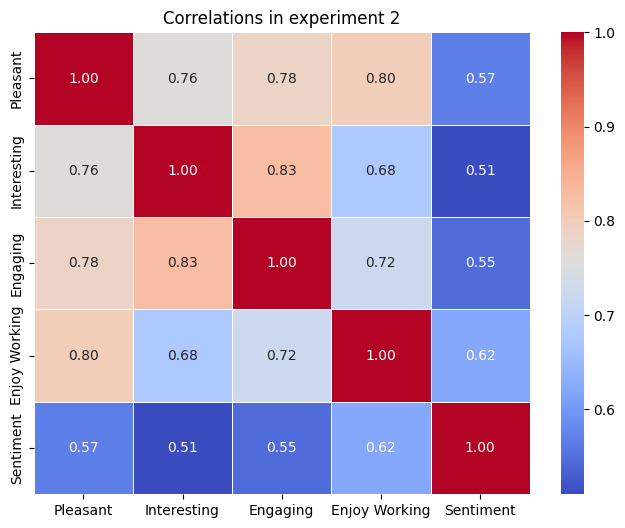

In [23]:
plot_heatmap(corr_e2, "Correlations in experiment 2")

In [24]:
df = combined_e2.copy()
df.rename(columns={"Enjoy Working": "Enjoy_Working"}, inplace=True)

def nested_sentiment_model_selection(df):
    """
    Performs nested model selection for the sentiment dependent variable
    """
    m01 = ols("Sentiment ~ Enjoy_Working", data=df).fit()
    m02 = ols("Sentiment ~ Pleasant + Enjoy_Working ", data=df).fit()
    anovaResults = anova_lm(m01, m02)
    print(anovaResults)
    print("\n\n")

    m01 = ols("Sentiment ~ Pleasant + Enjoy_Working", data=df).fit()
    m02 = ols("Sentiment ~ Pleasant + Enjoy_Working  + Engaging", data=df).fit()
    anovaResults = anova_lm(m01, m02)
    print(anovaResults)
    print("\n\n")

    m01 = ols("Sentiment ~ Pleasant + Enjoy_Working  + Engaging", data=df).fit()
    m02 = ols(
        "Sentiment ~ Pleasant + Enjoy_Working  + Engaging + Interesting", data=df
    ).fit()
    anovaResults = anova_lm(m01, m02)
    print(anovaResults)
    print("\n\n")

nested_sentiment_model_selection(df)

   df_resid         ssr  df_diff    ss_diff          F    Pr(>F)
0     838.0  491.558998      0.0        NaN        NaN       NaN
1     837.0  480.607112      1.0  10.951886  19.073226  0.000014



   df_resid         ssr  df_diff   ss_diff          F   Pr(>F)
0     837.0  480.607112      0.0       NaN        NaN      NaN
1     836.0  473.398433      1.0  7.208679  12.730198  0.00038



   df_resid         ssr  df_diff   ss_diff        F    Pr(>F)
0     836.0  473.398433      0.0       NaN      NaN       NaN
1     835.0  472.944967      1.0  0.453466  0.80061  0.371169





In [25]:
def preprocess(combined_e1):
    """
    Given a dataframe, use a correct format for sentiment classes, and split it into tran and test
    """
    combined_e1['Sentiment'] = combined_e1['Sentiment'].replace(-1, 0)

    # Step 3: Split the DataFrame into train and test sets
    train_ratio = 0.8  # You can adjust the ratio as needed
    test_ratio = 1 - train_ratio

    train_df, test_df = train_test_split(combined_e1, test_size=test_ratio, random_state=42)
    # Prepare the data
    train_df.rename(columns={"Enjoy Working": "Enjoy_Working"}, inplace=True)
    test_df.rename(columns={"Enjoy Working": "Enjoy_Working"}, inplace=True)  # Rename columns if needed

    return train_df, test_df

def evaluate(model, test_df, features):
    """Evaluates the provided model using F1 and accuracy"""
    predictions = model.predict(sm.add_constant(test_df[features]))
    # Convert the probabilities to binary predictions using a threshold (e.g., 0.5)
    threshold = 0.5
    binary_predictions = (predictions > threshold).astype(int)

    # Calculate F1 score and accuracy
    true_labels = test_df['Sentiment']  # Assuming 'Sentiment' is the true label column in your test data

    f1 = f1_score(true_labels, binary_predictions)
    accuracy = accuracy_score(true_labels, binary_predictions)

    print("F1 Score:", f1)
    print("Accuracy:", accuracy)


train_df, test_df = preprocess(combined_e1)
features = ['Pleasant', 'Enjoy_Working', 'Engaging']
m03 = sm.Logit(train_df['Sentiment'], sm.add_constant(train_df[features])).fit()
evaluate(m03, test_df, features)




Optimization terminated successfully.
         Current function value: 0.443478
         Iterations 6
F1 Score: 0.8589341692789969
Accuracy: 0.8275862068965517


In [26]:
train_df, test_df = preprocess(combined_e2)
features = ['Pleasant', 'Enjoy_Working', 'Engaging']
m03 = sm.Logit(train_df['Sentiment'], sm.add_constant(train_df[features])).fit()
evaluate(m03, test_df, features)


Optimization terminated successfully.
         Current function value: 0.406262
         Iterations 7
F1 Score: 0.8405797101449276
Accuracy: 0.8035714285714286


In [27]:
random_seed = 42
np.random.seed(random_seed)
train_df, test_df = preprocess(combined_e1)


rf = RandomForestClassifier(n_estimators=100, max_depth=2)
model = rf.fit(train_df[['Pleasant', 'Enjoy_Working', 'Engaging', ]], train_df['Sentiment'])
y_predict = model.predict(test_df[['Pleasant', 'Enjoy_Working', 'Engaging', ]])

# print(model.params)
print('accuracy score:', accuracy_score(test_df['Sentiment'], y_predict))
print('F1 score:', f1_score(test_df['Sentiment'], y_predict))

accuracy score: 0.8275862068965517
F1 score: 0.8543689320388349


In [28]:
random_seed = 42
np.random.seed(random_seed)
train_df, test_df = preprocess(combined_e2)


rf = RandomForestClassifier(n_estimators=100, max_depth=2)
model = rf.fit(train_df[['Pleasant', 'Enjoy_Working', 'Engaging', ]], train_df['Sentiment'])
y_predict = model.predict(test_df[['Pleasant', 'Enjoy_Working', 'Engaging', ]])

# print(model.params)
print('accuracy score:', accuracy_score(test_df['Sentiment'], y_predict))
print('F1 score:', f1_score(test_df['Sentiment'], y_predict))

accuracy score: 0.8095238095238095
F1 score: 0.8490566037735849


In [29]:
random_seed = 42
np.random.seed(random_seed)

train_df, test_df = preprocess(combined_e1)
true_labels = test_df['Sentiment'] 

random_predictions = np.random.randint(2, size=len(true_labels))
f1 = f1_score(true_labels, random_predictions)
accuracy = accuracy_score(true_labels, random_predictions)

print("F1 Score:", f1)
print("Accuracy:", accuracy)


# Calculate the most frequent class
most_frequent_class = train_df['Sentiment'].value_counts().idxmax()
# Number of test examples
num_test_examples = len(true_labels)
# Generate predictions always using the most frequent class
constant_predictions = [most_frequent_class] * num_test_examples
# Calculate F1 score and accuracy
f1 = f1_score(true_labels, constant_predictions, average='weighted')
accuracy = accuracy_score(true_labels, constant_predictions)

print("F1 Score:", f1)
print("Accuracy:", accuracy)

F1 Score: 0.5473684210526317
Accuracy: 0.5057471264367817
F1 Score: 0.451868961850813
Accuracy: 0.6015325670498084


In [30]:
random_seed = 42
np.random.seed(random_seed)

train_df, test_df = preprocess(combined_e2)
true_labels = test_df['Sentiment'] 

random_predictions = np.random.randint(2, size=len(true_labels))
f1 = f1_score(true_labels, random_predictions)
accuracy = accuracy_score(true_labels, random_predictions)

print("F1 Score:", f1)
print("Accuracy:", accuracy)


# Calculate the most frequent class
most_frequent_class = train_df['Sentiment'].value_counts().idxmax()
# Number of test examples
num_test_examples = len(true_labels)
# Generate predictions always using the most frequent class
constant_predictions = [most_frequent_class] * num_test_examples
# Calculate F1 score and accuracy
f1 = f1_score(true_labels, constant_predictions, average='weighted')
accuracy = accuracy_score(true_labels, constant_predictions)

print("F1 Score:", f1)
print("Accuracy:", accuracy)

F1 Score: 0.6210526315789473
Accuracy: 0.5714285714285714
F1 Score: 0.4514515843512126
Accuracy: 0.6011904761904762


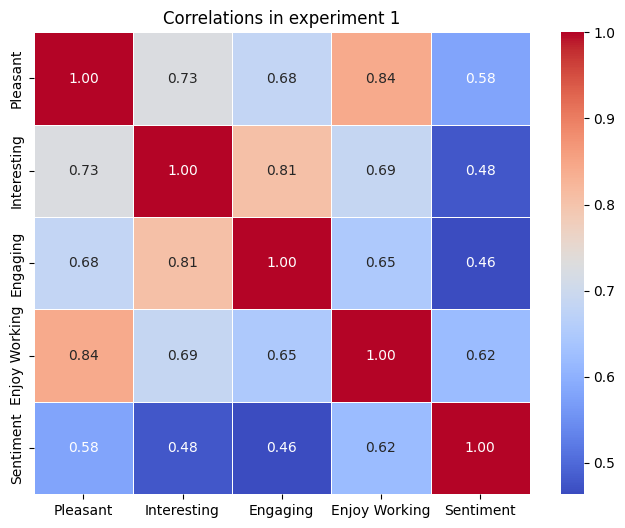

In [31]:
plot_heatmap(corr_e1, "Correlations in experiment 1")

In [32]:
model = SentenceTransformer("all-MiniLM-L6-v2")

In [33]:
def max_length(text):
    """Returns the length of the largest sentense"""
    max_len = 0
    for t in text:
        if len(t) > max_len:
            max_len = len(t)
    max_len

In [34]:
all_text = pd.concat(
    [combined_e1["Sentences Overall"], combined_e2["Sentences Overall"]]
)
max_length(all_text)

In [35]:
exp1_texts = combined_e1[["Participant ID", "Sentences Overall"]].copy()
exp2_texts = combined_e2[["Participant ID", "Sentences Overall"]].copy()
exp1_texts["embedding"] = combined_e1["Sentences Overall"].apply(model.encode)
exp2_texts["embedding"] = combined_e2["Sentences Overall"].apply(model.encode)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [36]:
all_text = pd.concat([exp1_texts, exp2_texts])

In [37]:
vectors = all_text["embedding"].to_numpy()

# Create an empty NumPy array to store the appended vectors
roberta_embedding = np.empty((0, vectors[0].shape[0]))

# Use a for loop to append vectors to the new array
for vector in vectors:
    roberta_embedding = np.append(roberta_embedding, [vector], axis=0)

In [38]:
vectorizer = TfidfVectorizer()
tfid_embedding = vectorizer.fit_transform(all_text["Sentences Overall"].values)
vectorizer.get_feature_names_out()
tfid_embedding = tfid_embedding.toarray()

In [39]:
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words="english")
count_embedding = vectorizer.fit_transform(
    all_text["Sentences Overall"].values
).toarray()

/Users/alexanders/ml-project-2-peaceduke-1/.venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


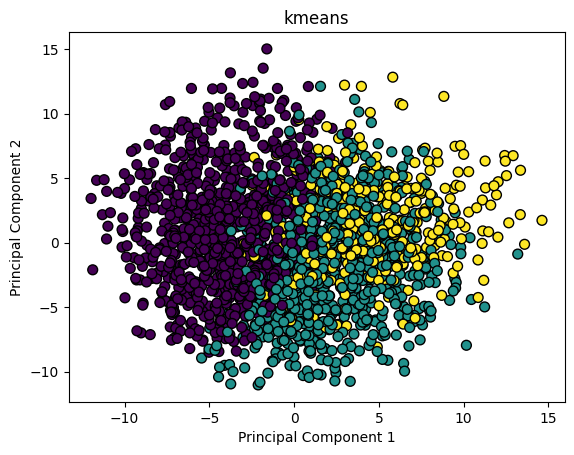

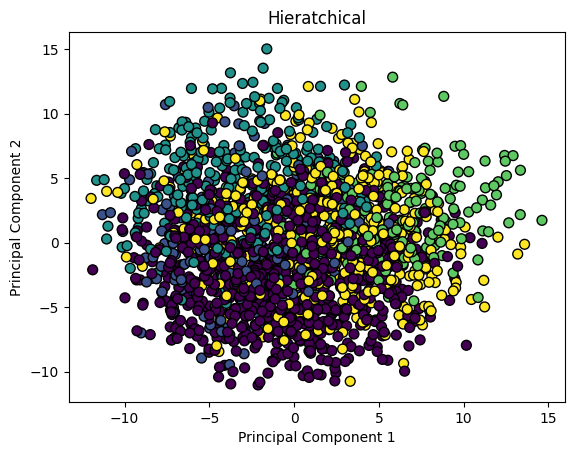

(array([0, 0, 0, ..., 0, 0, 1], dtype=int32), array([2, 2, 2, ..., 0, 2, 4]))

In [40]:
def scale(data):
    """Applies scaling to data"""
    scaler = StandardScaler()
    return scaler.fit_transform(data)


def plot_clusters(scaled_data, labels, title):
    """Projects clusters into 2D for visualization"""
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(scaled_data)

    plt.figure()
    plt.scatter(
        pca_result[:, 0],
        pca_result[:, 1],
        c=labels,
        cmap="viridis",
        edgecolors="k",
        s=50,
    )
    plt.xlabel('Principal Component 1')  # Label for x-axis
    plt.ylabel('Principal Component 2')  # Label for y-axis
    plt.title(title)
    plt.savefig(f'{title}.png')
    plt.show()

    


scaled_data = scale(roberta_embedding)


def cluster(scaled_data, plot=True):
    """Applies K means clustering with k=3 to the scaled data"""
    # K-means clustering
    kmeans = KMeans(n_clusters=3)  # You can adjust the number of clusters as needed
    kmeans_labels = kmeans.fit_predict(scaled_data)

    # Hierarchical clustering
    agg_clustering = AgglomerativeClustering(
        n_clusters=5, linkage="ward"
    )  # You can adjust the number of clusters and linkage as needed
    agg_labels = agg_clustering.fit_predict(scaled_data)

    if plot:
        plot_clusters(scaled_data, kmeans_labels, "kmeans")
        plot_clusters(scaled_data, agg_labels, "Hieratchical")

    return (kmeans_labels, agg_labels)


cluster(scaled_data)

In [41]:
db_roberta_clustering = DBSCAN(metric="manhattan").fit_predict(scale(roberta_embedding))
db_tfid_clustering = DBSCAN(metric="manhattan").fit_predict(scale(tfid_embedding))
count_embedding_clustering = DBSCAN(metric="manhattan").fit_predict(scale(count_embedding))

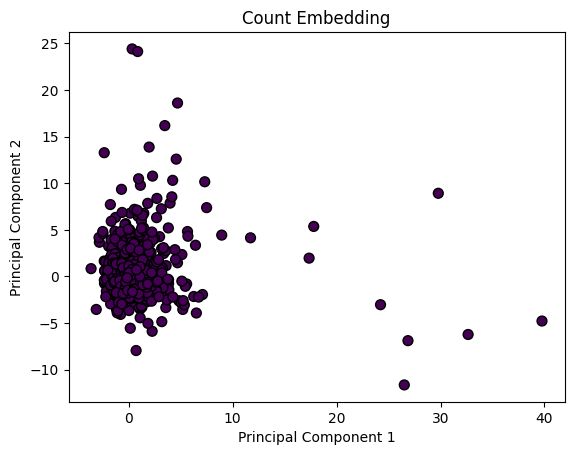

In [42]:
plot_clusters(scale(count_embedding), count_embedding_clustering, "Count Embedding")

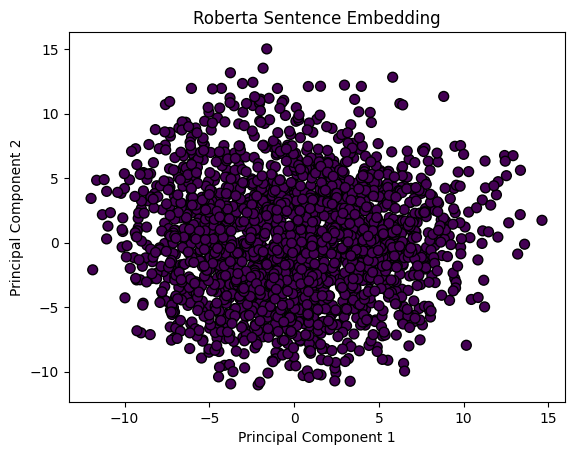

In [43]:
plot_clusters(scale(roberta_embedding), db_roberta_clustering, "Roberta Sentence Embedding")

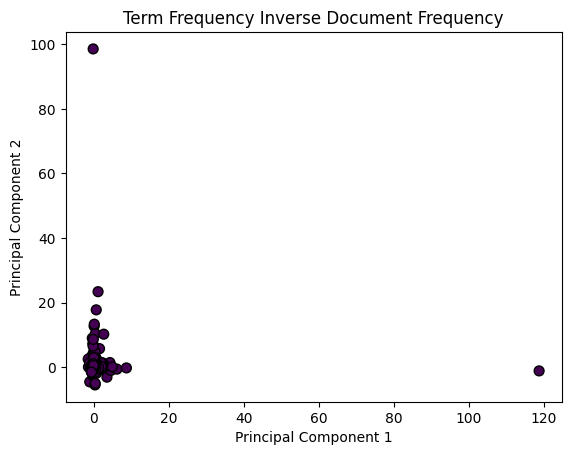

In [44]:
plot_clusters(scale(tfid_embedding), db_tfid_clustering, "Term Frequency Inverse Document Frequency")

In [45]:
# top words for each topic
def display_topics(model, feature_names, no_top_words):
    """Discovers topics using LDA model"""
    topics = {}
    for topic_idx, topic in enumerate(model.components_):
        topics["Topic %d:" % (topic_idx)] = " ".join(
            [feature_names[i] for i in topic.argsort()[: -no_top_words - 1 : -1]]
        )
    return topics


n_topics = 5
n_top_words = 10

# combine the text from both experiments
all_text = pd.concat(
    [combined_e1["Sentences Overall"], combined_e2["Sentences Overall"]]
)

vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words="english")
text_data_vectorized = vectorizer.fit_transform(all_text)

lda = LatentDirichletAllocation(
    n_components=n_topics,
    max_iter=5,
    learning_method="online",
    learning_offset=50.0,
    random_state=0,
)
lda.fit(text_data_vectorized)

# feature names from the vectorizer
tf_feature_names = vectorizer.get_feature_names_out()

display_topics(lda, tf_feature_names, n_top_words)

{'Topic 0:': 'view nice feels sunny campus open space weather like sky',
 'Topic 1:': 'depressing urban dominant room noise contrasting backside mood semester harsh',
 'Topic 2:': 'like trash bins sky looks rest want good working walls',
 'Topic 3:': 'different despite previous scene interesting roads styles shapes dense better',
 'Topic 4:': 'like view nice buildings lot trees building mountains people grey'}

Topic 0: May represent views that are perceived as clean, comforting, and with a notable presence of pedestrian paths. This suggests a preference for scenes that portray order and accessibility.

Topic 1: Seems to be associated with aesthetically pleasing views, indicated by terms like 'nice', 'interesting', and 'colors', perhaps describing the visual appeal of the scenes.

Topic 2: Could be related to scenes that lack engaging elements, as indicated by words like 'boring', 'luminosity', and 'traffic'. This might reflect a negative sentiment towards too much activity or dullness in a scene.

Topic 3: Appears to describe a personal connection with the scene, as words like 'like', 'feels', and 'people' suggest a more subjective and emotional response.

Topic 4: Might reflect a mix of opinions where some find certain scenes 'spacious' and others 'annoying', indicating varied preferences and perceptions.

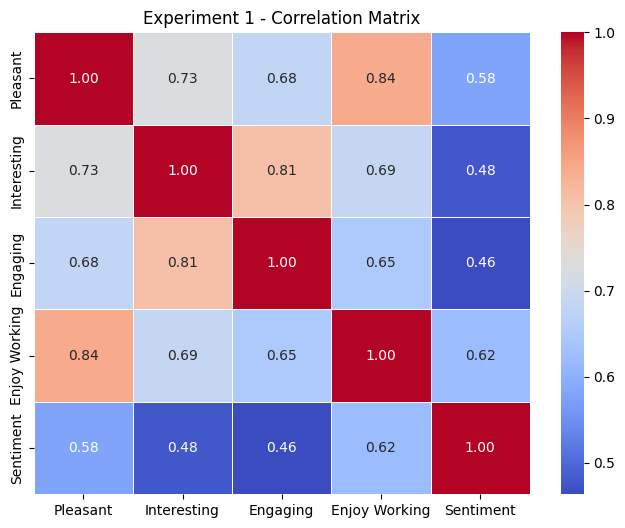

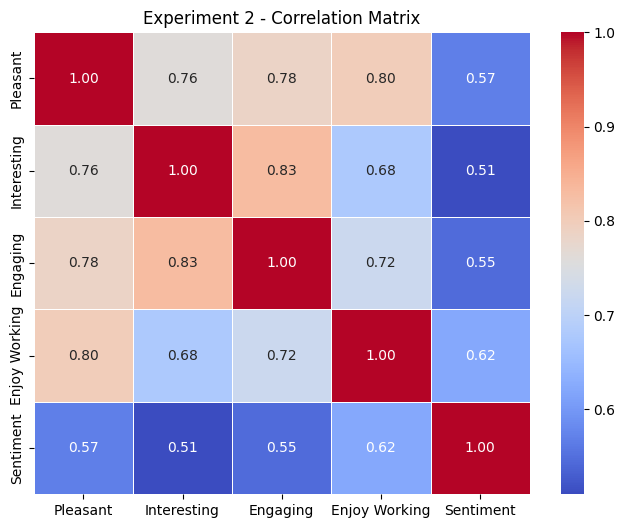

In [46]:
columns_to_correlate = [
    "Pleasant",
    "Interesting",
    "Engaging",
    "Enjoy Working",
    "Sentiment",
]

exp1_correlation_matrix = combined_e1[columns_to_correlate].corr()
exp2_correlation_matrix = combined_e2[columns_to_correlate].corr()

plot_heatmap(exp1_correlation_matrix, "Experiment 1 - Correlation Matrix")
plot_heatmap(exp2_correlation_matrix, "Experiment 2 - Correlation Matrix")

In [47]:
# topic with the highest probability will be the dominant topic for that impression
lda_exp1_topics = lda.transform(vectorizer.transform(combined_e1["Sentences Overall"]))
lda_exp2_topics = lda.transform(vectorizer.transform(combined_e2["Sentences Overall"]))
combined_e1["Dominant_Topic"] = np.argmax(lda_exp1_topics, axis=1) + 1
combined_e2["Dominant_Topic"] = np.argmax(lda_exp2_topics, axis=1) + 1

# corr between Dominant Topic and numerical ratings for exp 1
correlation_matrix_exp1 = combined_e1[
    ["Pleasant", "Interesting", "Engaging", "Enjoy Working", "Dominant_Topic"]
].corr()
print("Correlation Matrix for Experiment 1:\n", correlation_matrix_exp1)

# Perform a simple linear regression analysis on Experiment 1 data
X = combined_e1[
    ["Interesting", "Engaging", "Enjoy Working", "Dominant_Topic"]
]  # independent variables
y = combined_e1["Pleasant"]  # dependent variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

# ANOVA to compare means across different topics for exp1
anova_results = f_oneway(
    combined_e1["Pleasant"][combined_e1["Dominant_Topic"] == 1],
    combined_e1["Pleasant"][combined_e1["Dominant_Topic"] == 2],
    combined_e1["Pleasant"][combined_e1["Dominant_Topic"] == 3],
    combined_e1["Pleasant"][combined_e1["Dominant_Topic"] == 4],
    combined_e1["Pleasant"][combined_e1["Dominant_Topic"] == 5],
)
print("ANOVA results (F-statistic and p-value):", anova_results)

Correlation Matrix for Experiment 1:
                 Pleasant  Interesting  Engaging  Enjoy Working  Dominant_Topic
Pleasant        1.000000     0.725969  0.681895       0.840909       -0.033781
Interesting     0.725969     1.000000  0.807018       0.685769       -0.038511
Engaging        0.681895     0.807018  1.000000       0.648690       -0.065450
Enjoy Working   0.840909     0.685769  0.648690       1.000000       -0.050353
Dominant_Topic -0.033781    -0.038511 -0.065450      -0.050353        1.000000
Mean Squared Error: 1.0936232828413104
R^2 Score: 0.7624160894911697
ANOVA results (F-statistic and p-value): F_onewayResult(statistic=2.7998303623546166, pvalue=0.024824270984778293)


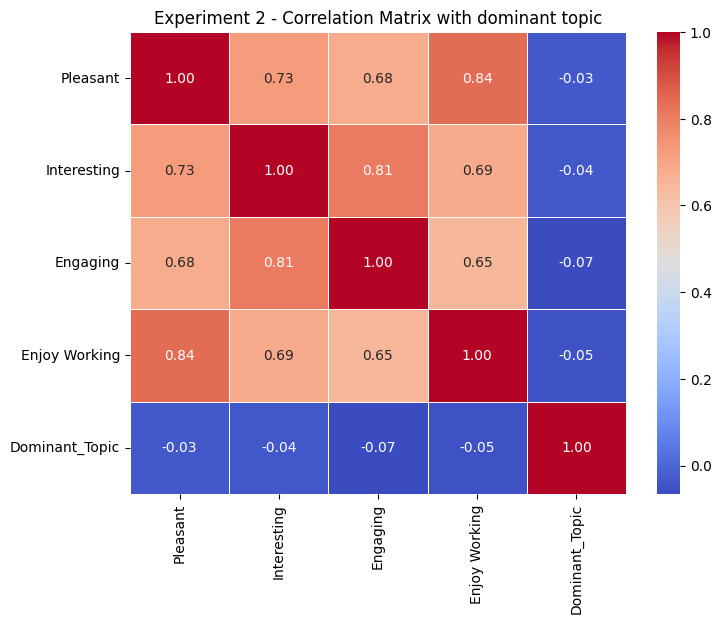

In [48]:
plot_heatmap(
    correlation_matrix_exp1, "Experiment 2 - Correlation Matrix with dominant topic"
)

In [49]:
cars_df = pd.read_csv(
    "https://raw.githubusercontent.com/focods/WonderfulML/master/data/mtcars.csv"
)
m01 = ols("mpg ~ am + wt", data=cars_df).fit()
m02 = ols("mpg ~ am + wt + am:wt", data=cars_df).fit()
anovaResults = anova_lm(m01, m02)
print(anovaResults)

   df_resid         ssr  df_diff    ss_diff         F    Pr(>F)
0      29.0  278.319697      0.0        NaN       NaN       NaN
1      28.0  188.007666      1.0  90.312031  13.45018  0.001017


We can check the importance of each feature by doing nested linear modeling. We start with "enjoy_working" as the only allowed feature in linear regression, since this feature was the most strongly correlated with "pleasant". We can see that adding the feature "interesting" induces a statistically significant reduction in the residual sum of squares. The only other barely significant feature is "engaging"

There is a strong positive correlation between Pleasant and Enjoy Working (0.83), indicating that the more pleasant the participants found the scene, the more they enjoyed working in front of it.
Interesting and Engaging are also highly correlated (0.80), suggesting that scenes that are interesting are also engaging to the participants.
Dominant_Topic has a much lower correlation with the other variables, indicating that the topic derived from the sentiment analysis has a lesser direct association with how pleasant, interesting, engaging, or enjoyable the work was.

The Mean Squared Error (MSE) of the regression model is approximately 1.037, and the R-squared (R²) value is 0.775. The MSE is a measure of the average squared difference between the observed actual outcoming values and the values predicted by the model. A lower MSE indicates a better fit. The R² value represents the proportion of variance for the dependent variable that's explained by the independent variables in the model. An R² of 0.775 suggests that approximately 77.5% of the variability in the Pleasant score can be explained by the model, which is relatively high and indicates a good fit.

The ANOVA results show a significant F-statistic (10.224) with a very small p-value (4.92e-08), which indicates that there are statistically significant differences in the Pleasant rating across the different topics derived from the impressions. This suggests that the topic of an impression (how the scene is described) has a significant effect on how pleasant the participants rate the scene.

In [50]:
# Dominant Topic and numerical ratings for exp 2
correlation_matrix_exp2 = combined_e2[
    ["Pleasant", "Interesting", "Engaging", "Enjoy Working", "Dominant_Topic"]
].corr()
print("Correlation Matrix for Experiment 2:\n", correlation_matrix_exp2)

X_exp2 = combined_e2[["Interesting", "Engaging", "Enjoy Working", "Dominant_Topic"]]
y_exp2 = combined_e2["Pleasant"]
X_train_exp2, X_test_exp2, y_train_exp2, y_test_exp2 = train_test_split(
    X_exp2, y_exp2, test_size=0.2, random_state=0
)

regressor_exp2 = LinearRegression()
regressor_exp2.fit(X_train_exp2, y_train_exp2)
y_pred_exp2 = regressor_exp2.predict(X_test_exp2)
mse_exp2 = mean_squared_error(y_test_exp2, y_pred_exp2)
r2_exp2 = r2_score(y_test_exp2, y_pred_exp2)
print("Mean Squared Error for Experiment 2:", mse_exp2)
print("R^2 Score for Experiment 2:", r2_exp2)

anova_results_exp2 = f_oneway(
    combined_e2["Pleasant"][combined_e2["Dominant_Topic"] == 1],
    combined_e2["Pleasant"][combined_e2["Dominant_Topic"] == 2],
    combined_e2["Pleasant"][combined_e2["Dominant_Topic"] == 3],
    combined_e2["Pleasant"][combined_e2["Dominant_Topic"] == 4],
    combined_e2["Pleasant"][combined_e2["Dominant_Topic"] == 5],
)
print("ANOVA results for Experiment 2 (F-statistic and p-value):", anova_results_exp2)

Correlation Matrix for Experiment 2:
                 Pleasant  Interesting  Engaging  Enjoy Working  Dominant_Topic
Pleasant        1.000000     0.760322  0.784669       0.800393       -0.017457
Interesting     0.760322     1.000000  0.830543       0.676416        0.023264
Engaging        0.784669     0.830543  1.000000       0.722532        0.036363
Enjoy Working   0.800393     0.676416  0.722532       1.000000        0.006004
Dominant_Topic -0.017457     0.023264  0.036363       0.006004        1.000000
Mean Squared Error for Experiment 2: 0.8076345302692445
R^2 Score for Experiment 2: 0.7423282128061228
ANOVA results for Experiment 2 (F-statistic and p-value): F_onewayResult(statistic=nan, pvalue=nan)


/Users/alexanders/ml-project-2-peaceduke-1/.venv/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4133: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '


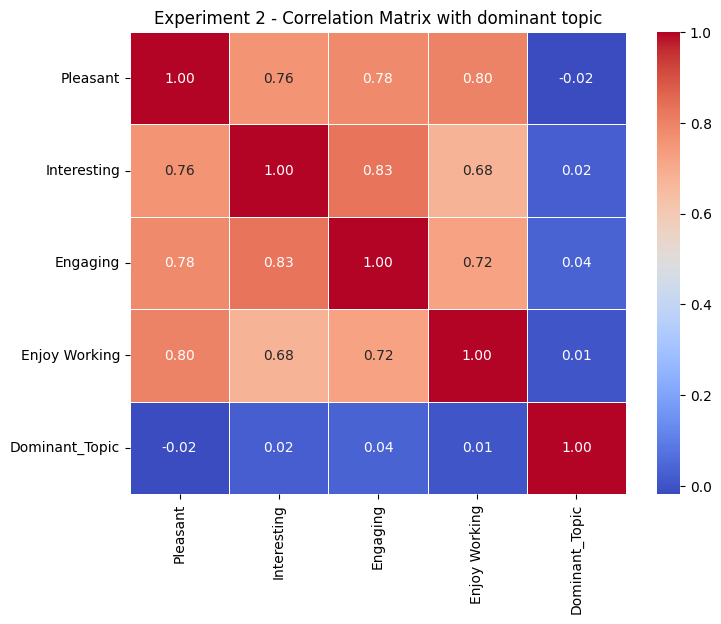

In [51]:
plot_heatmap(
    correlation_matrix_exp2, "Experiment 2 - Correlation Matrix with dominant topic"
)

Just as before, we start with "enjoy_working" as the only allowed feature in linear regression, since this feature was the most strongly correlated with "pleasant". Similarly to experiment 1, adding the feature "interesting" induces a statistically significant reduction in the residual sum of squares. Also, feature "engaging" is significant, but much more than in experiment 1.

Similar to experiment 1, there are strong positive correlations between Pleasant and Enjoy Working (0.80), Pleasant and Engaging (0.78), as well as Pleasant and Interesting (0.73). This indicates that participants generally found scenes pleasant when they were also engaging and interesting.
The Dominant_Topic again shows a low correlation with the other variables, suggesting that the topic identified by the LDA model does not strongly predict the numerical ratings given by participants.

The Mean Squared Error (MSE) for the linear regression model is approximately 0.998, which is slightly lower than that for Experiment 1, suggesting the predictions for Experiment 2 are marginally more accurate.
The R-squared (R²) value is 0.734, indicating that about 73.4% of the variability in the Pleasant rating is explained by the model, which is slightly lower than that for Experiment 1 but still indicates a good fit.

The ANOVA test for experiment 2 yields an F-statistic of 3.873 and a p-value of 0.0042, which is statistically significant at the typical alpha level of 0.05. This suggests there are significant differences in how participants rated the pleasantness of scenes based on the topics their impressions were categorized into.

**Comparing Experiments 1 and 2**

Both experiments show similar patterns of strong correlations between Pleasant and the other ratings (Interesting, Engaging, Enjoy Working).
The Dominant_Topic derived from the impressions does not strongly correlate with the numerical ratings in either experiment, but it does have a significant effect on the Pleasant rating as indicated by the ANOVA results.
The regression models for both experiments are robust, explaining a significant proportion of the variance in the Pleasant ratings.

**Conclusions**

Participants' impressions are consistent with their ratings across different dimensions, such as how engaging or interesting they find a scene.
The topic of an impression, while not a strong predictor on its own, does significantly affect the pleasantness rating, and different topics result in different average ratings.
The models and tests applied show good predictive power and statistical significance, which suggests that the subjective textual data has quantifiable effects on participants' ratings.
These results provide a comprehensive understanding of how participants' textual impressions relate to their quantitative ratings and could inform further research or practical applications such as design choices in environments that aim to enhance pleasantness or engagement.







/Users/alexanders/ml-project-2-peaceduke-1/.venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster       0    1    2
Scene Type               
Image       255  167  231
Video       256  189  207
         Pleasant  Interesting  Engaging  Enjoy Working  Sentiment
Cluster                                                           
0        5.935421     5.491194  5.189824       5.772994   0.614481
1        3.449438     2.966292  2.842697       2.904494   0.179775
2        7.881279     7.500000  7.267123       7.908676   0.920091
Cluster
0    511
2    438
1    356
Name: count, dtype: int64


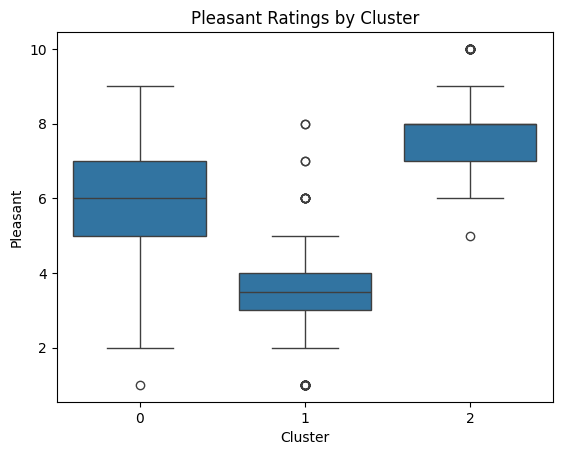

In [52]:
combined_e1 = combined_e1.dropna()
features_for_clustering = combined_e1[
    ["Pleasant", "Interesting", "Engaging", "Enjoy Working", "Sentiment"]
].dropna()
kmeans = KMeans(n_clusters=3, random_state=0).fit(features_for_clustering)
combined_e1["Cluster"] = kmeans.labels_

scene_cluster_ct = pd.crosstab(combined_e1["Scene Type"], combined_e1["Cluster"])
print(scene_cluster_ct)


cluster_means = combined_e1.groupby("Cluster")[
    ["Pleasant", "Interesting", "Engaging", "Enjoy Working", "Sentiment"]
].mean()
print(cluster_means)

cluster_counts = combined_e1["Cluster"].value_counts()
print(cluster_counts)

sns.boxplot(x="Cluster", y="Pleasant", data=combined_e1)
plt.title("Pleasant Ratings by Cluster")
plt.show()

In [53]:
silhouette_avg = silhouette_score(features_for_clustering, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.3311127307260985


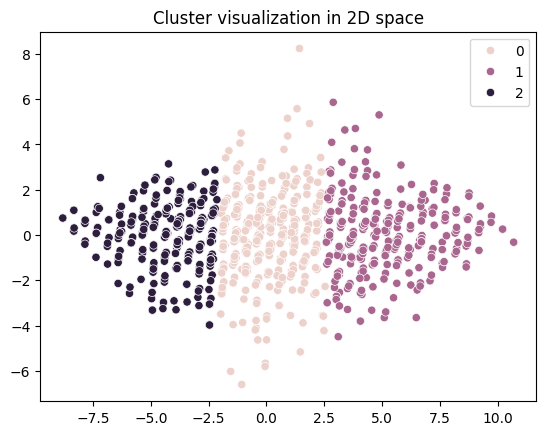

In [54]:
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(features_for_clustering)
sns.scatterplot(x=reduced_features[:, 0], y=reduced_features[:, 1], hue=kmeans.labels_)
plt.title("Cluster visualization in 2D space")
plt.show()

The cluster visualization shows the distribution of data points into three distinct clusters in a 2D space, likely reduced from higher dimensions using a method like PCA (Principal Component Analysis). Here's how you can interpret and proceed with the results from the clustering and other analyses:

- The clusters seem reasonably well-separated, although there is some overlap.
- **Cluster 0** has high ratings across all variables and the highest sentiment score, suggesting these are the most positive impressions.
- **Cluster 1** has the lowest ratings and sentiment, indicating a group of less favorable impressions.
- **Cluster 2** seems to represent a middle ground with moderate ratings and sentiment.

A silhouette score of ~0.34 suggests that the clusters are not very clearly defined.

In [55]:
ct = pd.crosstab(combined_e1["Dominant_Topic"], combined_e1["Cluster"])
chi2, p, dof, expected = chi2_contingency(ct)
print(f"Chi-square test result: Chi2 = {chi2}, p-value = {p}")

Chi-square test result: Chi2 = 21.711821080556305, p-value = 0.005478642905072449


The Chi-square test result with a Chi-square value of 46.808 and a p-value of approximately 1.67e-07 indicates a strong statistical significance.

The significant result implies that the way participants describe scenes (which determines the dominant topic) is not randomly distributed across the clusters defined by their ratings on pleasantness, interestingness, engagement, enjoyment in working, and sentiment. Instead, certain topics are more likely to be in certain clusters.

Top words for cluster 0 in 'Interesting': ['like', 'nice', 'view', 'buildings', 'lot', 'trees', 'grey', 'building', 'quite', 'people']
Top words for cluster 1 in 'Interesting': ['like', 'nice', 'view', 'lot', 'mountains', 'people', 'buildings', 'really', 'interesting', 'building']
Top words for cluster 2 in 'Interesting': ['like', 'view', 'grey', 'don', 'nice', 'buildings', 'building', 'trees', 'feel', 'construction']


/Users/alexanders/ml-project-2-peaceduke-1/.venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


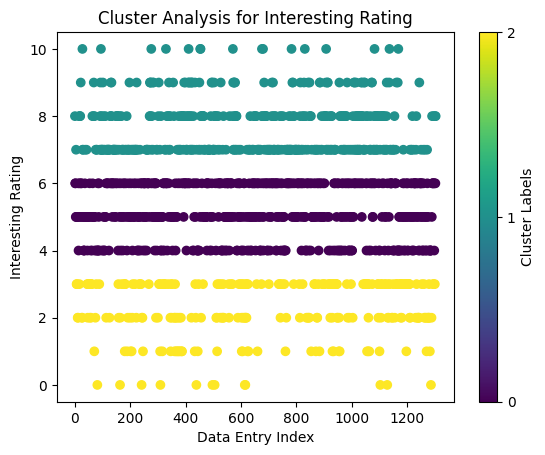

In [56]:
# For Interesting
interesting_normalized = StandardScaler().fit_transform(
    combined_e1[["Interesting"]].values.reshape(-1, 1)
)

kmeans_interesting = KMeans(n_clusters=3, random_state=0).fit(interesting_normalized)
combined_e1["Cluster_Interesting"] = kmeans_interesting.labels_

tfidf_vectorizer = TfidfVectorizer(stop_words="english")
text_tfidf = tfidf_vectorizer.fit_transform(combined_e1["Sentences Overall"])

text_data_clustered = {i: "" for i in range(kmeans_interesting.n_clusters)}
for i, cluster in enumerate(combined_e1["Cluster_Interesting"]):
    text_data_clustered[cluster] += combined_e1.iloc[i]["Sentences Overall"] + " "

for cluster, text in text_data_clustered.items():
    tfidf_cluster = tfidf_vectorizer.transform([text])
    sorted_words = np.argsort(tfidf_cluster.toarray()).flatten()[::-1]
    top_words = [tfidf_vectorizer.get_feature_names_out()[i] for i in sorted_words[:10]]
    print(f"Top words for cluster {cluster} in 'Interesting': {top_words}")

plt.scatter(
    combined_e1.index,
    combined_e1["Interesting"],
    c=combined_e1["Cluster_Interesting"],
    cmap="viridis",
)
plt.title("Cluster Analysis for Interesting Rating")
plt.xlabel("Data Entry Index")
plt.ylabel("Interesting Rating")
plt.colorbar(ticks=range(kmeans_interesting.n_clusters), label="Cluster Labels")
plt.show()

/Users/alexanders/ml-project-2-peaceduke-1/.venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Top words for cluster 0 in 'Engaging': ['like', 'nice', 'lot', 'buildings', 'view', 'trees', 'building', 'quite', 'people', 'grey']
Top words for cluster 1 in 'Engaging': ['nice', 'like', 'view', 'mountains', 'people', 'lot', 'buildings', 'interesting', 'really', 'building']
Top words for cluster 2 in 'Engaging': ['grey', 'view', 'like', 'nice', 'building', 'don', 'buildings', 'feels', 'feel', 'trees']


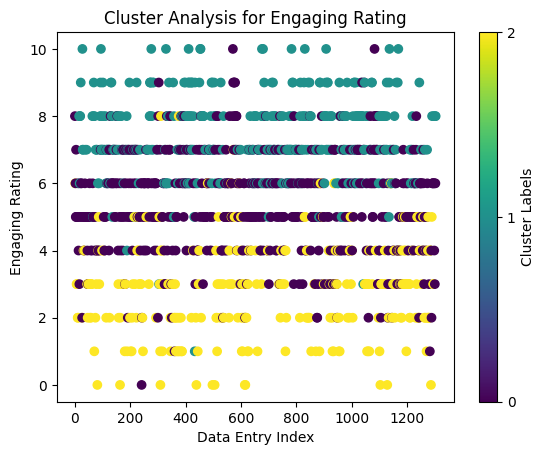

In [57]:
# Engaging
engaging_normalized = StandardScaler().fit_transform(combined_e1[["Engaging"]])

kmeans = KMeans(n_clusters=3, random_state=0)
combined_e1["Cluster_Engaging"] = kmeans.fit_predict(engaging_normalized)

tfidf_vectorizer = TfidfVectorizer(stop_words="english")
text_tfidf = tfidf_vectorizer.fit_transform(combined_e1["Sentences Overall"])

text_data_clustered = {i: "" for i in range(kmeans_interesting.n_clusters)}
for i, cluster in enumerate(combined_e1["Cluster_Engaging"]):
    text_data_clustered[cluster] += combined_e1.iloc[i]["Sentences Overall"] + " "

for cluster, text in text_data_clustered.items():
    tfidf_cluster = tfidf_vectorizer.transform([text])
    sorted_words = np.argsort(tfidf_cluster.toarray()).flatten()[::-1]
    top_words = [tfidf_vectorizer.get_feature_names_out()[i] for i in sorted_words[:10]]
    print(f"Top words for cluster {cluster} in 'Engaging': {top_words}")

plt.scatter(
    combined_e1.index,
    combined_e1["Interesting"],
    c=combined_e1["Cluster_Engaging"],
    cmap="viridis",
)
plt.title("Cluster Analysis for Engaging Rating")
plt.xlabel("Data Entry Index")
plt.ylabel("Engaging Rating")
plt.colorbar(ticks=range(kmeans_interesting.n_clusters), label="Cluster Labels")
plt.show()

In [58]:
df = combined_e1.copy()
df.rename(columns={'Enjoy Working': 'Enjoy_Working'}, inplace=True)

def nested_model_selection(df):
    """ 
    Identifies most relevant predictors using nested model selection with ANOVA
    """
    m01 = ols('Pleasant ~ Enjoy_Working', data=df).fit()
    m02 = ols('Pleasant ~ Interesting + Enjoy_Working ', data=df).fit()
    anovaResults = anova_lm(m01, m02)
    print(anovaResults)
    print("\n\n")

    m01 = ols('Pleasant ~ Interesting + Enjoy_Working', data=df).fit()
    m02 = ols('Pleasant ~ Interesting + Enjoy_Working  + Dominant_Topic', data=df).fit()
    anovaResults = anova_lm(m01, m02)
    print(anovaResults)
    print("\n\n")

    m01 = ols('Pleasant ~ Interesting + Enjoy_Working', data=df).fit()
    m02 = ols('Pleasant ~ Interesting + Enjoy_Working  + Engaging', data=df).fit()
    anovaResults = anova_lm(m01, m02)
    print(anovaResults)
    print("\n\n")

    m01 = ols('Pleasant ~ Interesting + Enjoy_Working  + Engaging', data=df).fit()
    m02 = ols('Pleasant ~ Interesting + Enjoy_Working  + Engaging + Dominant_Topic', data=df).fit()
    anovaResults = anova_lm(m01, m02)
    print(anovaResults)
    print("\n\n")

nested_model_selection(df)

df2 = combined_e2.copy()
df2.rename(columns={'Enjoy Working': 'Enjoy_Working'}, inplace=True)

nested_model_selection(df2)

   df_resid          ssr  df_diff     ss_diff           F        Pr(>F)
0    1303.0  1617.392220      0.0         NaN         NaN           NaN
1    1302.0  1385.008781      1.0  232.383439  218.455826  8.141337e-46



   df_resid          ssr  df_diff   ss_diff         F    Pr(>F)
0    1302.0  1385.008781      0.0       NaN       NaN       NaN
1    1301.0  1384.489638      1.0  0.519143  0.487837  0.485019



   df_resid          ssr  df_diff    ss_diff          F    Pr(>F)
0    1302.0  1385.008781      0.0        NaN        NaN       NaN
1    1301.0  1365.379863      1.0  19.628918  18.703383  0.000016



   df_resid          ssr  df_diff   ss_diff         F    Pr(>F)
0    1301.0  1365.379863      0.0       NaN       NaN       NaN
1    1300.0  1364.470822      1.0  0.909041  0.866089  0.352213



   df_resid          ssr  df_diff     ss_diff           F        Pr(>F)
0     838.0  1123.213609      0.0         NaN         NaN           NaN
1     837.0   847.071084      1.0  276.142525 